# Oasis Infobytes : Data Science Internship

### Task 1 : Train a ML model for iris dataset

### Intern name : POLEPAKA SUMITH

In this task the ML model is built for classification of iris datset.

#### Step 1 : Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

#### Step 2 : Importing Dataset

In [2]:
data = pd.read_csv("Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.head() # For first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail() # For last 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.shape #Dimension of dataset

(150, 6)

In [6]:
data.describe() # descriptive Statistics

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data.info() # Information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


The iris dataset have one target column which is "Species" it is categorical. It has 4 variables of iris and none of the cells have null values.

#### Step 2 : Exploratory Data Analysis

In [8]:
# Using heatmap to know the correlation among the variables

In [9]:
data1 = data[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","Species"]]
print(data1.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


C:\Users\SUMITH\AppData\Local\Temp\ipykernel_7588\958968740.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data1.corr(),annot= True)


<Axes: >

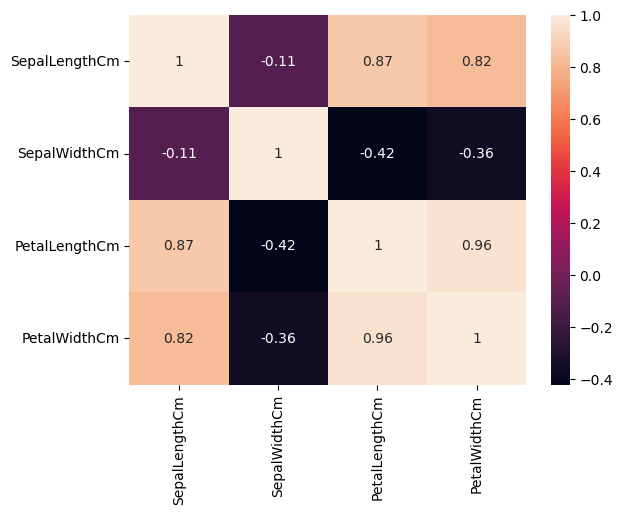

In [10]:
sns.heatmap(data1.corr(),annot= True)

From above heatmap it is seen that petal length and petal width are highly correlated.

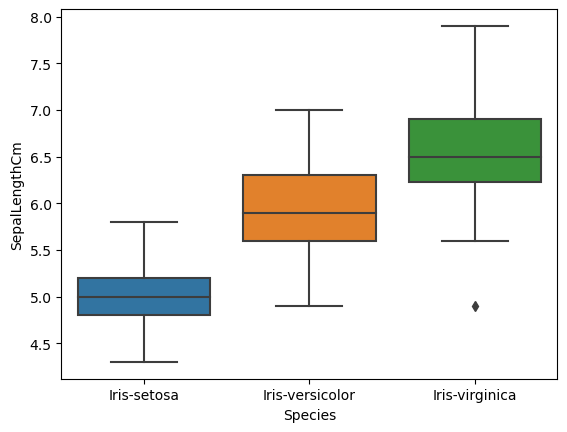

In [11]:
sns.boxplot(x=data.Species,y=data.SepalLengthCm)
plt.show()

From above boxplot in "Iris-virginica" one outlier is detected.

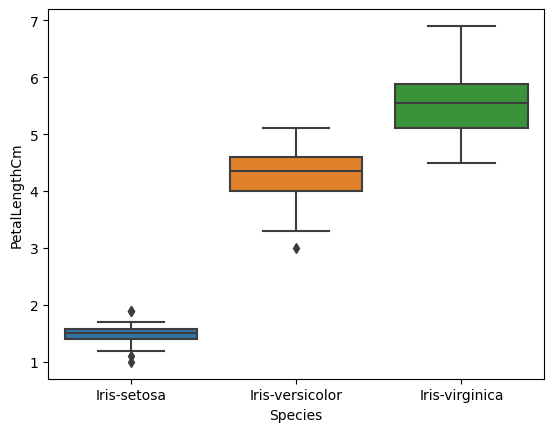

In [12]:
sns.boxplot(x=data.Species,y=data.PetalLengthCm)
plt.show()

From above boxplot in "Iris-versicolor" one outlier is detected.

#### Step 3 : Building ML model for classification

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
# Dividing dataset into train and test data
X=data1.drop('Species',axis = 1)
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
y=data1['Species']
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=21)

In [17]:
model = LogisticRegression()

In [18]:
model.fit(X_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
model_pred= model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [21]:
print("Accuracy:", accuracy_score(model_pred,y_test)*100)

Accuracy: 93.33333333333333


In [22]:
confusion_matrix(model_pred,y_test)

array([[14,  0,  0],
       [ 0, 13,  0],
       [ 0,  3, 15]], dtype=int64)

In [23]:
print(classification_report(model_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.81      1.00      0.90        13
 Iris-virginica       1.00      0.83      0.91        18

       accuracy                           0.93        45
      macro avg       0.94      0.94      0.94        45
   weighted avg       0.95      0.93      0.93        45



Interpretation : The above Logistic model has 93.33 accuracy which is quite enough that our model is good and therefore from confusion matrix it is seen that there are 3 misclassified variables in data.

# THANK YOU